In [1]:
import sys
sys.path.insert(0,'../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import util
import GA_util
import os

os.getcwd()

'/Users/aidanriley/Dropbox/Final GARDN Code_11_20/rbs'

In [2]:
data = pd.read_excel('data/COMPILED_MODEL_RBS_DATA.xlsx',sheet_name='processed')

In [3]:
data

,Name,Sequence,rep_1,rep_2,rep_3,Geometric Mean
0,RBS PRE OPT 1,GTCAGCGTTAAGACGTG,10.0,23.0,24.5,19.17
1,RBS PRE OPT 2,ATAGAGACGCCATACAA,18.6,17.8,23.5,19.97
2,RBS PRE OPT 3,CTTAGGACCATCTGTTA,13.1,13.2,15.4,13.90
3,RBS PRE OPT 4,ACCAGCCGGTTTCGGTA,16.1,24.6,25.7,22.13
4,RBS PRE OPT 5,GTCAAGGATTAGAACGT,16.7,24.0,22.4,21.03
5,RBS POST OPT 1,GTTAGGGAGGAGAATTT,449.0,2079.0,1000.0,1176.00
6,RBS POST OPT 3,ATGGAGGAGGCATATAT,718.0,745.0,900.0,787.70
7,RBS POST OPT 4,ATCAGGAGGATATGTTT,947.0,908.0,632.0,829.00
8,RBS POST OPT 5,ACCAGGAGGTCTTGACT,109.0,71.9,45.8,75.57
9,RBS POST OPT 6,GTTAAGGAGGAGAACTT,781.0,853.0,653.0,762.30


In [4]:
#stat tests
from scipy.stats import ttest_ind,mannwhitneyu

for i in range(1,7):
    
    if i == 2:
        pass
    else:
    
        print(i)
        print('RBS POST OPT %s'%i)
        x = data[data['Name'] == 'RBS POST OPT %s'%i][['rep_1','rep_2','rep_3']].values[0]

        for j in range(1,4):
            print(j)
            y = data[data['Name'] == 'RBS HIGH %s'%j][['rep_1','rep_2','rep_3']].values[0]
            print('RBS HIGH %s'%j)

    # _,p_val = ttest_ind(x,y,alternative='greater')
            _,p_val = ttest_ind(x,y,alternative='greater')
            print(x)
            print(y)
            print('p value is',p_val)
            print('\n')

1
RBS POST OPT 1
1
RBS HIGH 1
[ 449. 2079. 1000.]
[383. 300. 365.]
p value is 0.07985201237850967


2
RBS HIGH 2
[ 449. 2079. 1000.]
[168. 188. 237.]
p value is 0.055354358092821535


3
RBS HIGH 3
[ 449. 2079. 1000.]
[250. 305. 306.]
p value is 0.06853804414264102


3
RBS POST OPT 3
1
RBS HIGH 1
[718. 745. 900.]
[383. 300. 365.]
p value is 0.0010595343900092783


2
RBS HIGH 2
[718. 745. 900.]
[168. 188. 237.]
p value is 0.0003056367468238587


3
RBS HIGH 3
[718. 745. 900.]
[250. 305. 306.]
p value is 0.0005511484712533745


4
RBS POST OPT 4
1
RBS HIGH 1
[947. 908. 632.]
[383. 300. 365.]
p value is 0.004692310902827458


2
RBS HIGH 2
[947. 908. 632.]
[168. 188. 237.]
p value is 0.0016844149264660278


3
RBS HIGH 3
[947. 908. 632.]
[250. 305. 306.]
p value is 0.002895599563361218


5
RBS POST OPT 5
1
RBS HIGH 1
[109.   71.9  45.8]
[383. 300. 365.]
p value is 0.9995365604748051


2
RBS HIGH 2
[109.   71.9  45.8]
[168. 188. 237.]
p value is 0.9943320506121434


3
RBS HIGH 3
[109.   71.9  4

0 0
2 1
4 2
6 3
8 4


1 5
3 6
5 7
7 8
9 9
10
11
12


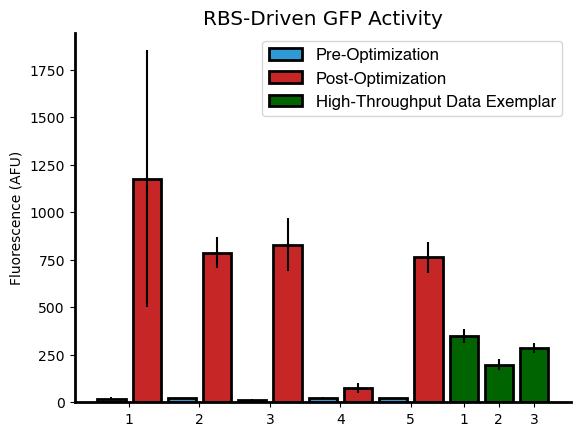

In [5]:
colors=[util.BLUE,util.BLUE,util.BLUE,util.BLUE,util.BLUE,util.RED,util.RED,util.RED,util.RED,util.RED,'darkgreen','darkgreen','darkgreen']
plt.figure()

for i,j in zip(range(0,12,2),range(5)):
    print(i,j)
    
    plt.bar(i,np.mean(data.iloc[j,2:5]),color=colors[j],edgecolor='black',linewidth=2,yerr=np.std(data.iloc[j,2:5]))
   
print('\n')
for i,j in zip(range(1,12,2),range(5,10,1)):
    print(i,j)
    
    plt.bar(i,np.mean(data.iloc[j,2:5]),color=colors[j],edgecolor='black',linewidth=2,yerr=np.std(data.iloc[j,2:5]))
    
for i in range(10,13,1):
    print(i)
    
    plt.bar(i,np.mean(data.iloc[i,2:5]),color=colors[i],edgecolor='black',linewidth=2,yerr=np.std(data.iloc[i,2:5]))
    
    
util.neat_plot()
plt.xticks([0.5,2.5,4.5,6.5,8.5,10,11,12],labels=[1,2,3,4,5,1,2,3])
plt.subplot().set_facecolor('white')
plt.title('RBS-Driven GFP Activity')
plt.ylabel('Fluorescence (AFU)')
legend = plt.legend(['Pre-Optimization','Post-Optimization','High-Throughput Data Exemplar'])

tmp = [util.BLUE,util.RED,'darkgreen']

for i,patch in enumerate(legend.get_patches()):
    patch.set_color(tmp[i])
    patch.set_linewidth(2)
    patch.set_edgecolor('black')
    
# plt.savefig('figures/RBS_optimization.svg',transparent=True,dpi=1000)

0 0
2 1
4 2
6 3
8 4


1 5
3 6
5 7
7 8
9 9
10
11
12


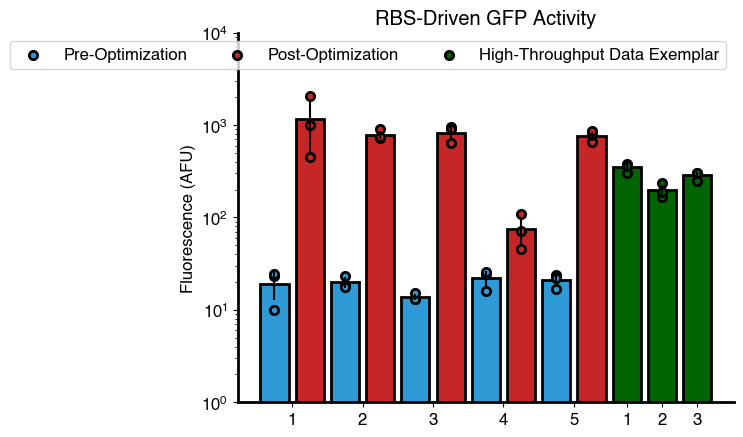

In [6]:
colors=[util.BLUE,util.BLUE,util.BLUE,util.BLUE,util.BLUE,util.RED,util.RED,util.RED,util.RED,util.RED,'darkgreen','darkgreen','darkgreen']
plt.figure()
plt.tight_layout()

for i,j in zip(range(0,12,2),range(5)):
    print(i,j)
    
    plt.bar(i,np.mean(data.iloc[j,2:5]),color=colors[j],edgecolor='black',linewidth=2,yerr=np.std(data.iloc[j,2:5]))
    plt.scatter([i,i,i],data.iloc[j,2:5],color=colors[j],edgecolor='black',linewidth=2)

   
print('\n')
for i,j in zip(range(1,12,2),range(5,10,1)):
    print(i,j)
    
    plt.bar(i,np.mean(data.iloc[j,2:5]),color=colors[j],edgecolor='black',linewidth=2,yerr=np.std(data.iloc[j,2:5]))
    plt.scatter([i,i,i],data.iloc[j,2:5],color=colors[j],edgecolor='black',linewidth=2)

    
for i in range(10,13,1):
    print(i)
    
    plt.bar(i,np.mean(data.iloc[i,2:5]),color=colors[i],edgecolor='black',linewidth=2,yerr=np.std(data.iloc[i,2:5]))
    plt.scatter([i,i,i],data.iloc[i,2:5],color=colors[i],edgecolor='black',linewidth=2)

    
    
plt.xticks([0.5,2.5,4.5,6.5,8.5,10,11,12],labels=[1,2,3,4,5,1,2,3])
plt.subplot().set_facecolor('white')
plt.title('RBS-Driven GFP Activity')
plt.ylabel('Fluorescence (AFU)')
legend = plt.legend(['Pre-Optimization','Post-Optimization','High-Throughput Data Exemplar'],ncol=3)
plt.yscale('log')

tmp = [util.BLUE,util.RED,'darkgreen']

for x,patch in enumerate(legend.legendHandles):
    patch.set_color(tmp[x])
    patch.set_linewidth(2)
    patch.set_edgecolor('black')
    
# plt.show()
plt.ylim([1,1e4])
util.neat_plot()
   
# plt.savefig('figures/RBS_optimization.svg',transparent=True,dpi=1000)

In [8]:
z = list(data.iloc[i,2:5].values)


[np.log10(i) for i in z]

[2.3979400086720375, 2.484299839346786, 2.48572142648158]

In [9]:
save = []

pre_values = data.iloc[:5]['Geometric Mean'].values

post_values = data.iloc[5:10]['Geometric Mean'].values

tmp = post_values/pre_values

In [10]:
tmp

array([61.3458529 , 39.44416625, 59.64028777,  3.41482151, 36.24821683])

In [11]:
np.mean(tmp)

40.018669051333184

In [12]:
print(np.power(np.prod(tmp),1/5))

28.209310752705935


In [13]:
tmp = data.iloc[5:10][['rep_1','rep_2','rep_3']].values

print(tmp)

print(tmp.mean(axis=1))

[[ 449.  2079.  1000. ]
 [ 718.   745.   900. ]
 [ 947.   908.   632. ]
 [ 109.    71.9   45.8]
 [ 781.   853.   653. ]]
[1176.          787.66666667  829.           75.56666667  762.33333333]


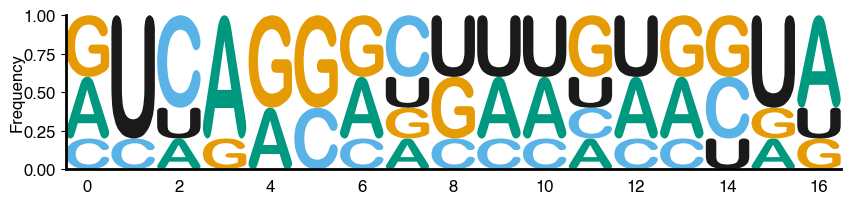

In [14]:
util.plot_logo(util.one_hot_encode(data.iloc[:5][['Sequence']]))
# plt.savefig('figures/pre_opt_rbs.svg',transparent=True,dpi=1000)

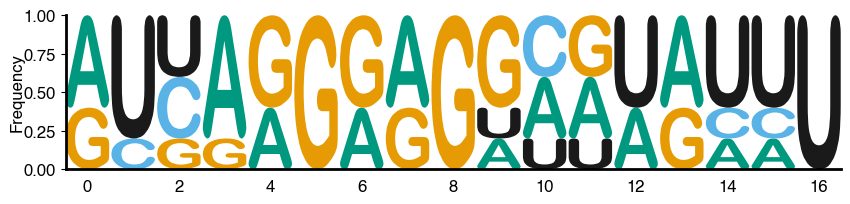

In [15]:
util.plot_logo(util.one_hot_encode(data.iloc[5:10][['Sequence']]))
# plt.savefig('figures/post_opt_rbs.svg',transparent=True,dpi=1000)

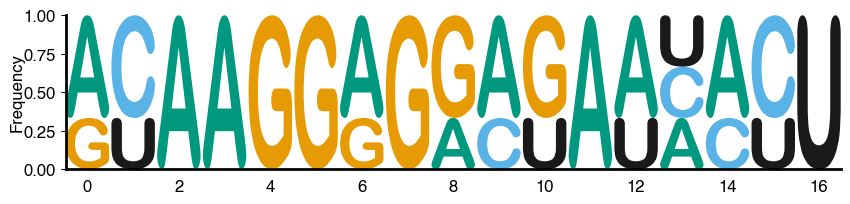

In [16]:
util.plot_logo(util.one_hot_encode(data.iloc[10:][['Sequence']]))
# plt.savefig('figures/ht_data_exemplars.svg',transparent=True)